# Import Libraries

In [ ]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

# rescale
from sklearn.preprocessing import StandardScaler

In [ ]:
#fixing imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
## Import Data
df = pd.read_csv('/content/E Commerce Dataset.csv')

# Explore Data

In [ ]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [ ]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

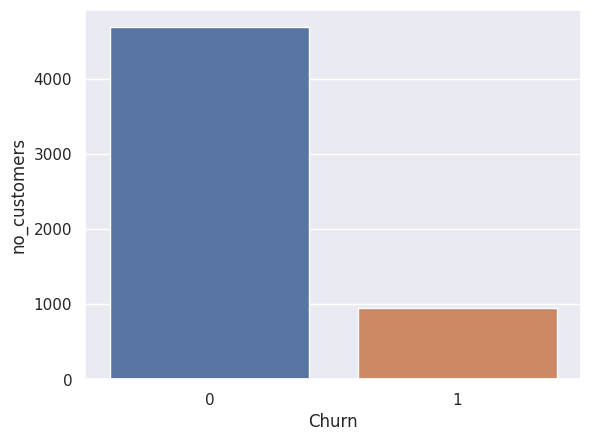

In [ ]:
#Explore No. of customers by Churn

df_noCust_by_target = df.groupby(by=['Churn']).agg(
          no_customers=('Churn','count')).reset_index()

sns.barplot(data=df_noCust_by_target, x='Churn', y='no_customers')
plt.show()

# Data Preparation


In [ ]:
# Eliminate row that contain null value
df = df.dropna()

In [ ]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
# สร้างตัวแปร one-hot encoding เฉพาะตัวแปรที่เป็น categorical
df_dummmies = pd.get_dummies(df[['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']])
df_dummmies

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
11,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
12,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5625,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5627,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
5628,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
df = df.merge(df_dummmies, left_index=True, right_index=True, how='inner')

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,0,0,0,1,0,0,0,0,0,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,1,0,0,1,0,0,0,0,0,1
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,...,0,0,0,0,0,1,0,0,0,1
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,...,1,1,0,0,0,0,0,0,0,1
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
# สร้าง Train-Test Dataset
X = df.drop(['CustomerID', 'Churn', 'PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'], axis=1)
y = df['Churn']

In [ ]:
X.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,...,1,0,0,1,0,0,0,0,0,1
5,0.0,1,22.0,3.0,5,5,2,1,22.0,4.0,...,0,0,0,0,0,1,0,0,0,1
11,11.0,1,6.0,3.0,4,3,10,1,13.0,0.0,...,1,1,0,0,0,0,0,0,0,1
12,0.0,1,11.0,2.0,3,3,2,1,13.0,2.0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
y.head()

0     1
3     1
5     1
11    1
12    1
Name: Churn, dtype: int64

In [ ]:
# rescale X
scaler = StandardScaler()

x_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled_array)
X_scaled.columns = X.columns

In [ ]:
# สร้าง Train-Test Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Model Creation and Evaluation

In [ ]:
class ModelEvaluator:
    def __init__(self, models,X_train, X_test, y_train, y_test):
        self.models = models
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    #Create Generic function to fit data and display results/predictions
    #clf = classifer
    def fit_evaluate(self):
        results = []

        for model_name, model in self.models.items():
          samplers = {'no_sampler':'none',
            'Under_Sampler': RandomUnderSampler(random_state=0),
            'Over_Sampler': RandomOverSampler(random_state=0),
            'SMOTE_Sampler': SMOTE(random_state=0),
          }


          for sampler_name, sampler in samplers.items():
            if sampler != 'none':
              sampler.fit(self.X_train, self.y_train)
              X_trainS, y_trainS = sampler.fit_resample(self.X_train, self.y_train)
            else:
              X_trainS = self.X_train
              y_trainS = self.y_train

            # fit model to training data
            model.fit(X_trainS, y_trainS)

            # make predictions for train data
            y_pred_train = model.predict(X_trainS)

            # make predictions for test data
            y_pred_test = model.predict(self.X_test)
            # print evaluation
            print(classification_report(self.y_test, y_pred_test))

            # Calculate F1 score
            f1 = f1_score(self.y_test, y_pred_test)
            precision = precision_score(self.y_test, y_pred_test)
            recall = recall_score(self.y_test, y_pred_test)

            results.append({'Model': model_name, 'Sampler': sampler_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
            print(f'Model: {model_name}, Sampler: {sampler_name}')
            print('\nConfusion Matrix: \n')
            s = sns.heatmap(confusion_matrix(self.y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
            s.set(xlabel='Predicted class', ylabel='True class')
            plt.show()

            fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_trainS)
            auc_train = roc_auc_score(y_pred_train, y_trainS)
            plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')
            fpr_test, tpr_test, _ = roc_curve(y_pred_test,  self.y_test)
            auc_test = roc_auc_score(y_pred_test, self.y_test)
            plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.legend(loc=4)
            plt.show()
        return pd.DataFrame(results)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       623
           1       0.77      0.48      0.60       132

    accuracy                           0.88       755
   macro avg       0.83      0.73      0.76       755
weighted avg       0.88      0.88      0.87       755

Model: Logistic Regression, Sampler: no_sampler

Confusion Matrix: 



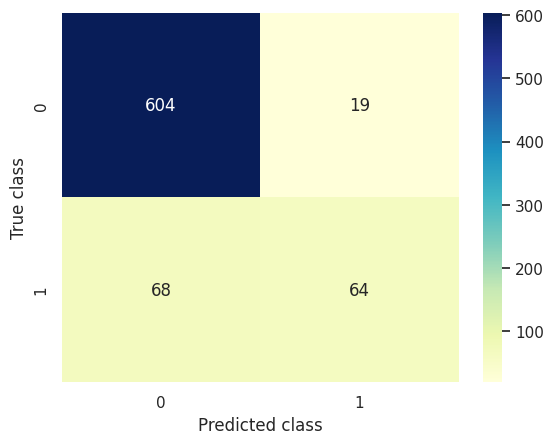

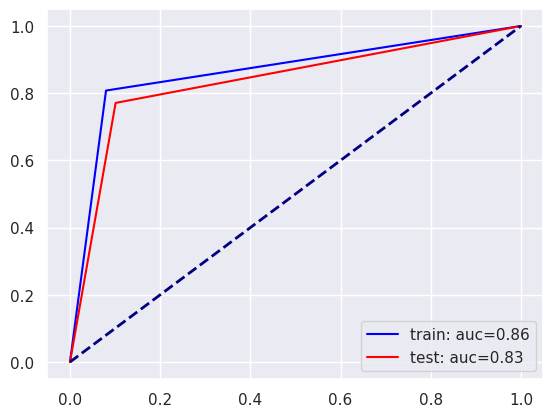

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       623
           1       0.46      0.80      0.58       132

    accuracy                           0.80       755
   macro avg       0.70      0.80      0.73       755
weighted avg       0.86      0.80      0.82       755

Model: Logistic Regression, Sampler: Under_Sampler

Confusion Matrix: 



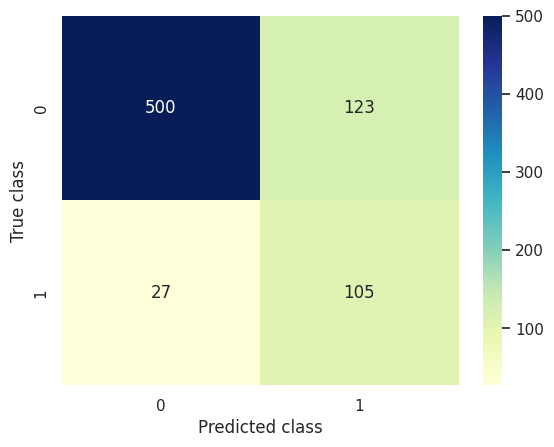

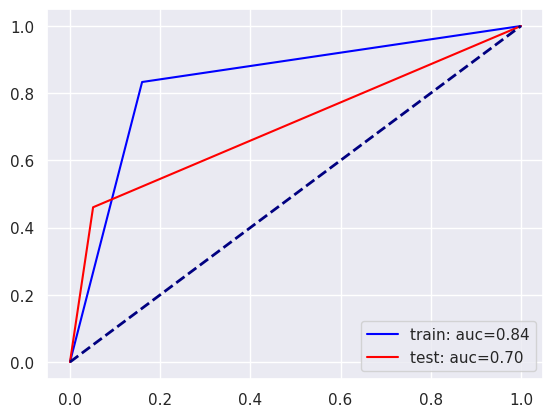

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       623
           1       0.45      0.77      0.57       132

    accuracy                           0.80       755
   macro avg       0.70      0.79      0.72       755
weighted avg       0.86      0.80      0.81       755

Model: Logistic Regression, Sampler: Over_Sampler

Confusion Matrix: 



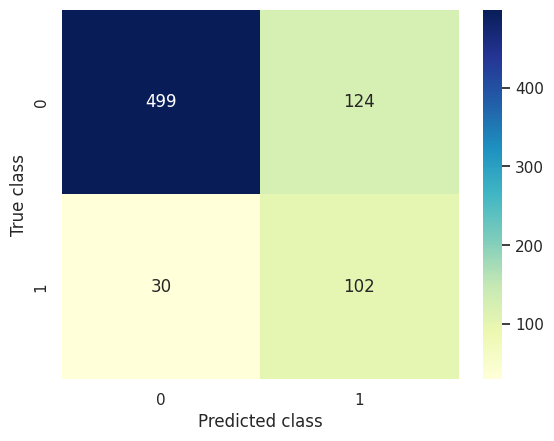

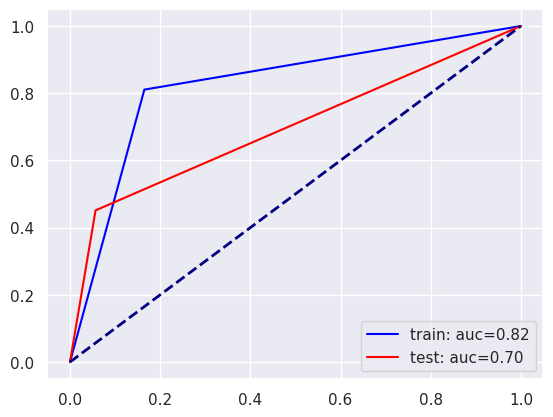

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       623
           1       0.46      0.77      0.58       132

    accuracy                           0.80       755
   macro avg       0.70      0.79      0.72       755
weighted avg       0.86      0.80      0.82       755

Model: Logistic Regression, Sampler: SMOTE_Sampler

Confusion Matrix: 



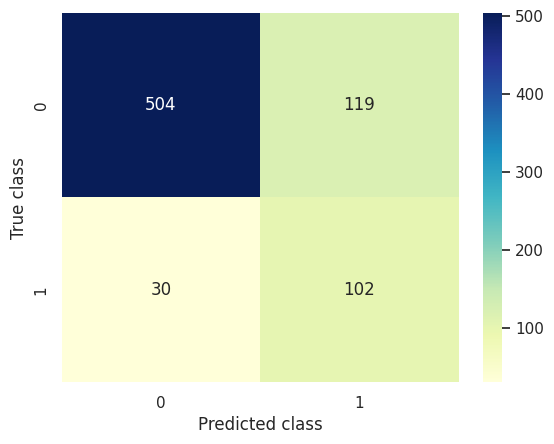

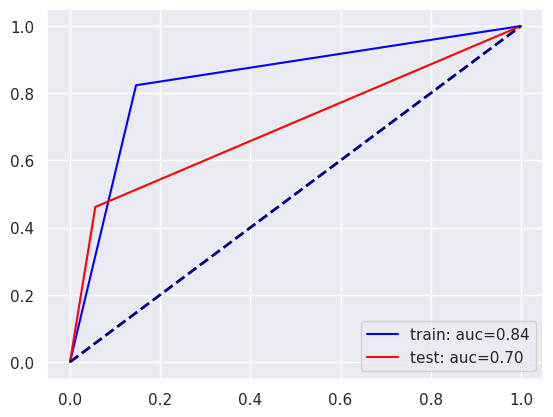

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       623
           1       0.98      0.83      0.90       132

    accuracy                           0.97       755
   macro avg       0.97      0.91      0.94       755
weighted avg       0.97      0.97      0.97       755

Model: Random Forest, Sampler: no_sampler

Confusion Matrix: 



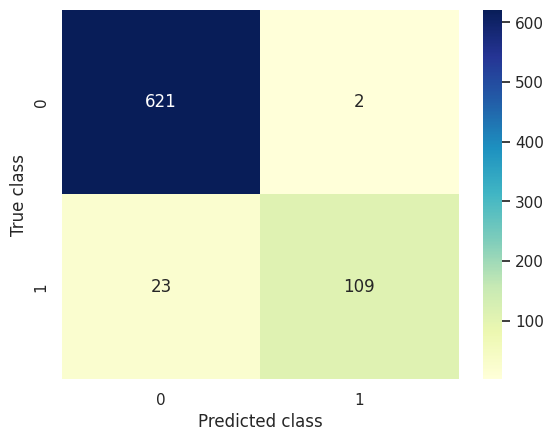

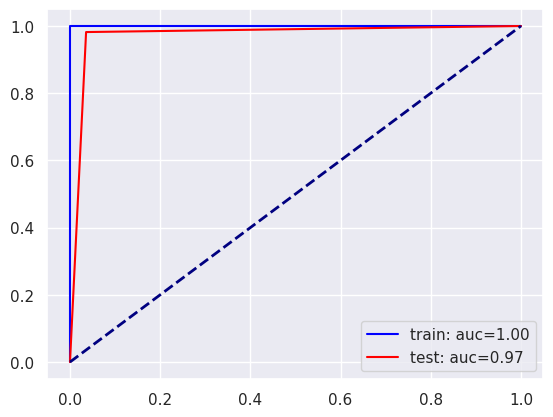

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       623
           1       0.62      0.93      0.75       132

    accuracy                           0.89       755
   macro avg       0.80      0.91      0.84       755
weighted avg       0.92      0.89      0.90       755

Model: Random Forest, Sampler: Under_Sampler

Confusion Matrix: 



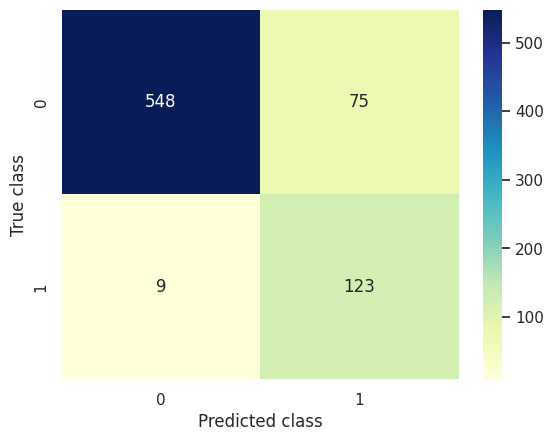

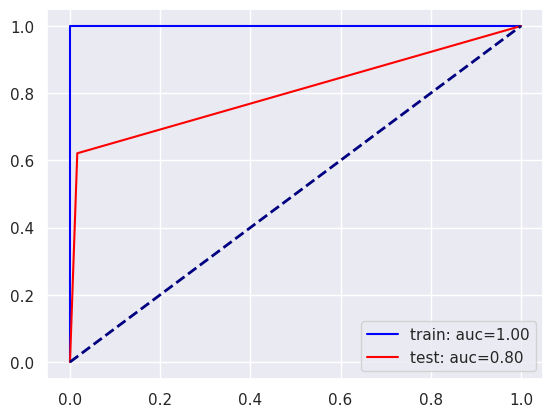

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       623
           1       0.98      0.90      0.94       132

    accuracy                           0.98       755
   macro avg       0.98      0.95      0.96       755
weighted avg       0.98      0.98      0.98       755

Model: Random Forest, Sampler: Over_Sampler

Confusion Matrix: 



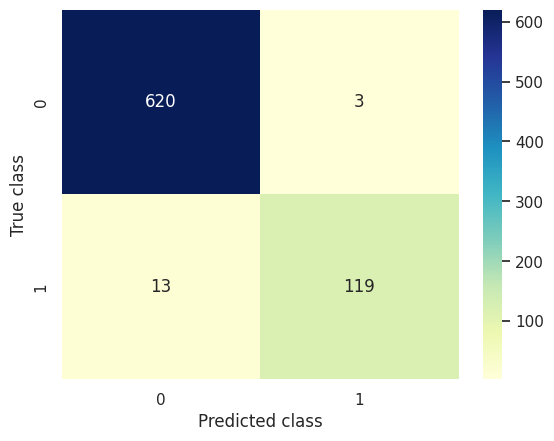

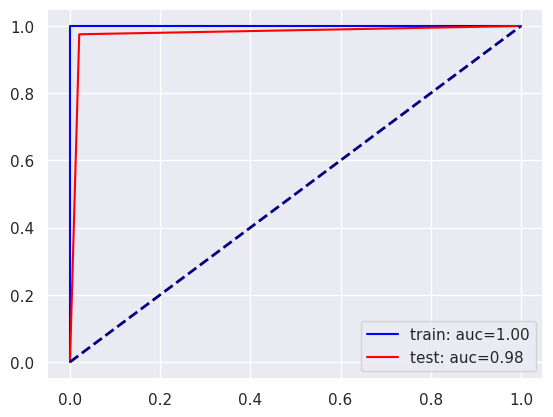

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       623
           1       0.98      0.85      0.91       132

    accuracy                           0.97       755
   macro avg       0.98      0.92      0.95       755
weighted avg       0.97      0.97      0.97       755

Model: Random Forest, Sampler: SMOTE_Sampler

Confusion Matrix: 



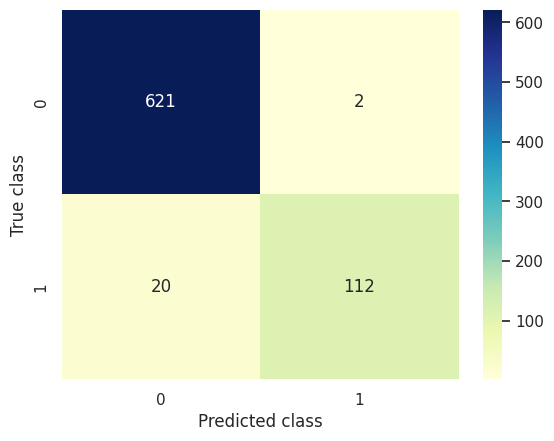

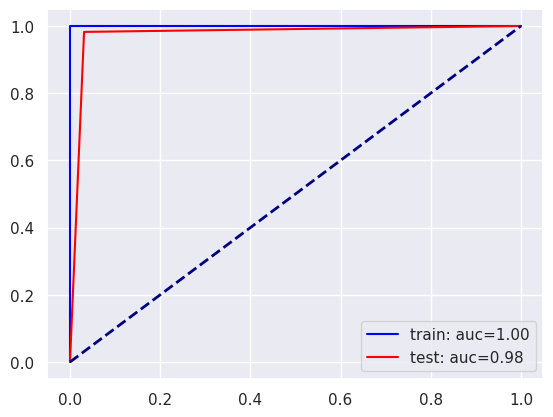

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       623
           1       0.71      0.37      0.49       132

    accuracy                           0.86       755
   macro avg       0.79      0.67      0.70       755
weighted avg       0.85      0.86      0.85       755

Model: KNeighbors, Sampler: no_sampler

Confusion Matrix: 



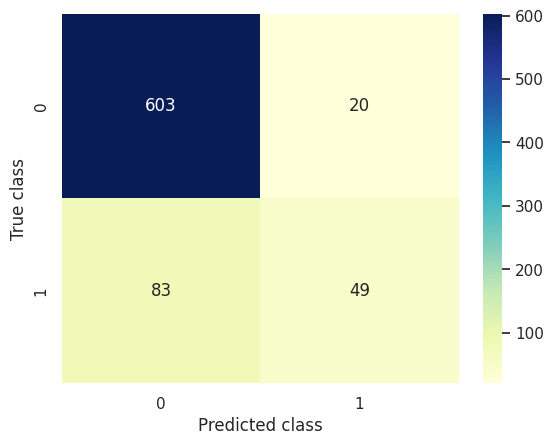

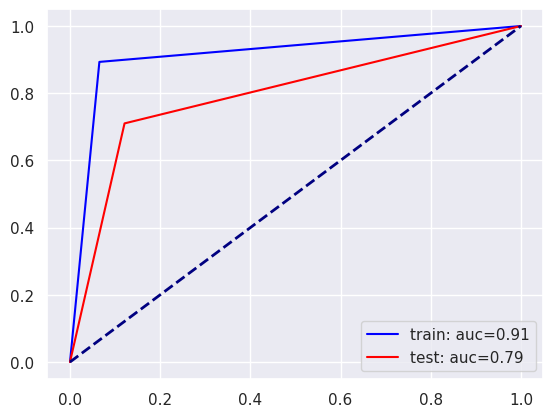

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       623
           1       0.37      0.81      0.51       132

    accuracy                           0.73       755
   macro avg       0.66      0.76      0.66       755
weighted avg       0.85      0.73      0.76       755

Model: KNeighbors, Sampler: Under_Sampler

Confusion Matrix: 



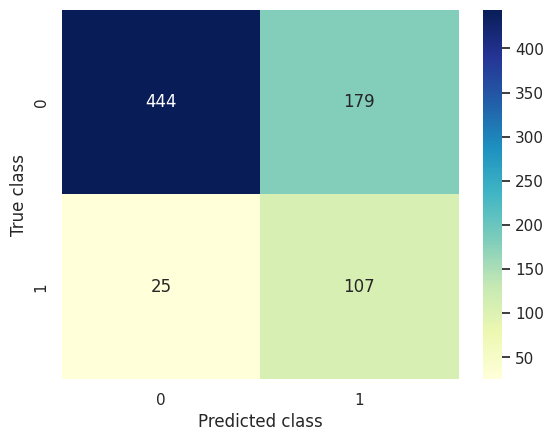

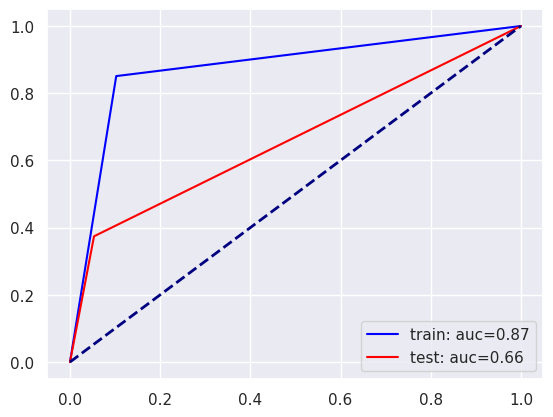

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       623
           1       0.61      0.86      0.71       132

    accuracy                           0.88       755
   macro avg       0.79      0.87      0.82       755
weighted avg       0.90      0.88      0.89       755

Model: KNeighbors, Sampler: Over_Sampler

Confusion Matrix: 



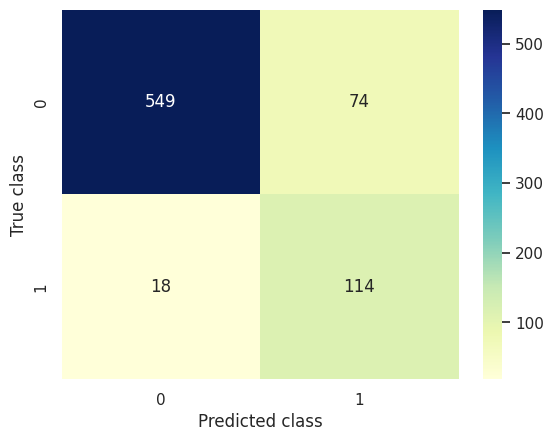

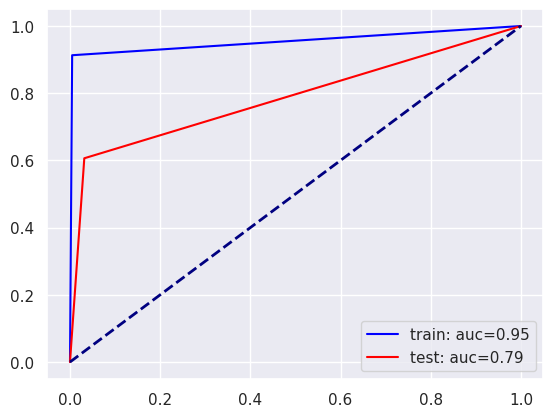

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       623
           1       0.57      0.88      0.69       132

    accuracy                           0.86       755
   macro avg       0.77      0.87      0.80       755
weighted avg       0.90      0.86      0.87       755

Model: KNeighbors, Sampler: SMOTE_Sampler

Confusion Matrix: 



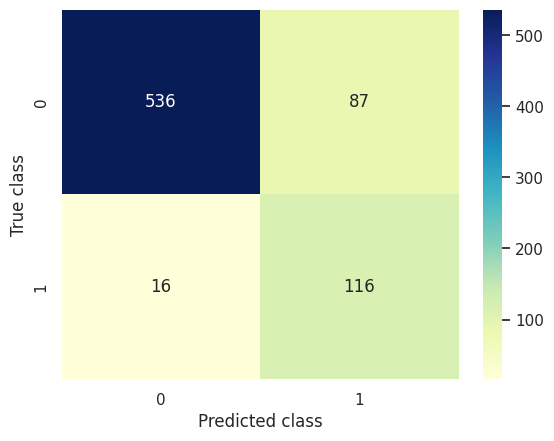

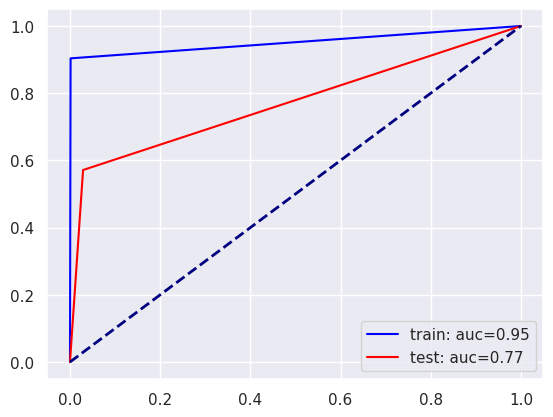

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       623
           1       0.95      0.95      0.95       132

    accuracy                           0.98       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.98      0.98      0.98       755

Model: XGBClassifier, Sampler: no_sampler

Confusion Matrix: 



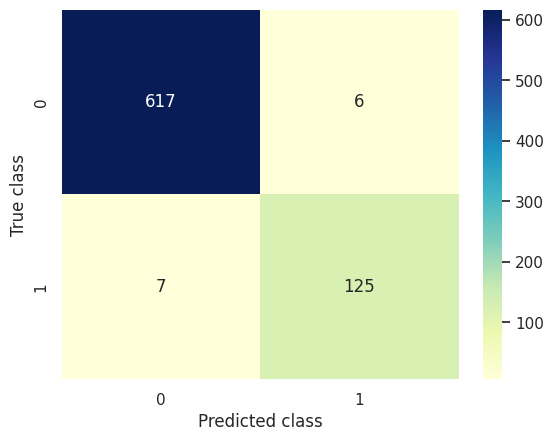

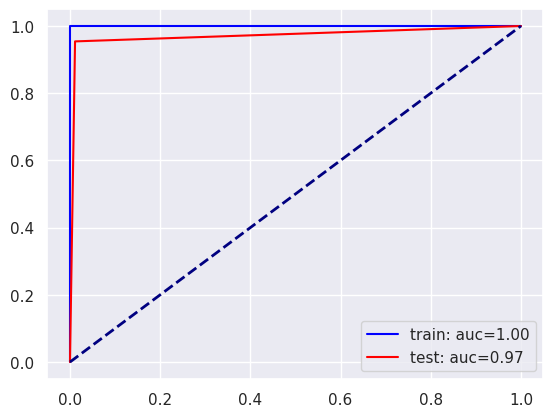

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       623
           1       0.71      0.95      0.81       132

    accuracy                           0.92       755
   macro avg       0.85      0.94      0.88       755
weighted avg       0.94      0.92      0.93       755

Model: XGBClassifier, Sampler: Under_Sampler

Confusion Matrix: 



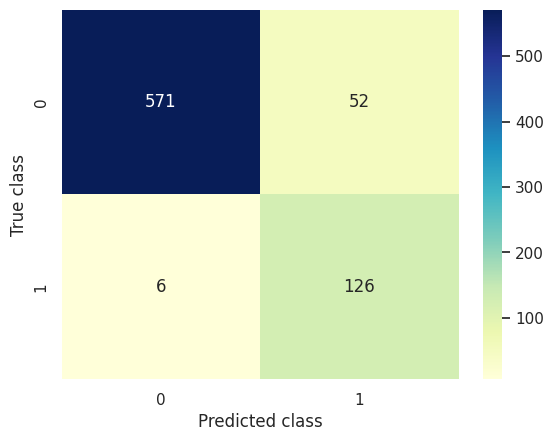

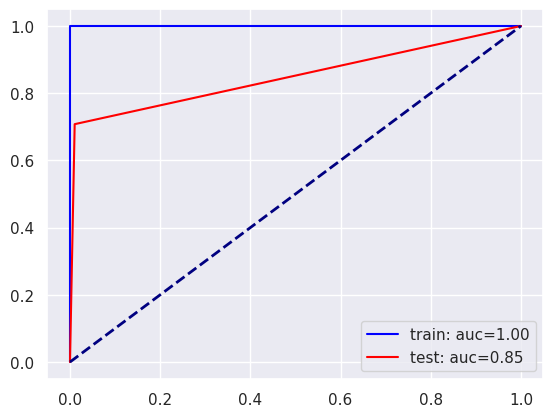

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       623
           1       0.93      0.96      0.94       132

    accuracy                           0.98       755
   macro avg       0.96      0.97      0.97       755
weighted avg       0.98      0.98      0.98       755

Model: XGBClassifier, Sampler: Over_Sampler

Confusion Matrix: 



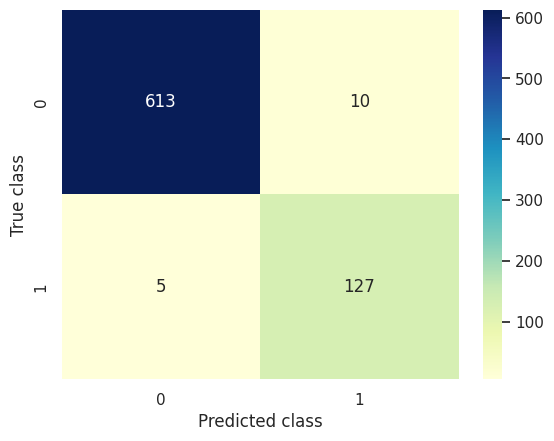

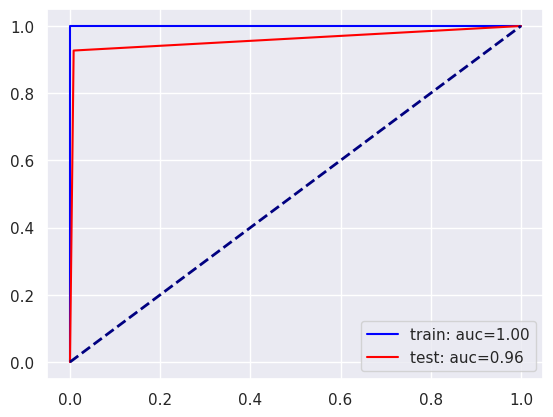

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       623
           1       0.94      0.89      0.92       132

    accuracy                           0.97       755
   macro avg       0.96      0.94      0.95       755
weighted avg       0.97      0.97      0.97       755

Model: XGBClassifier, Sampler: SMOTE_Sampler

Confusion Matrix: 



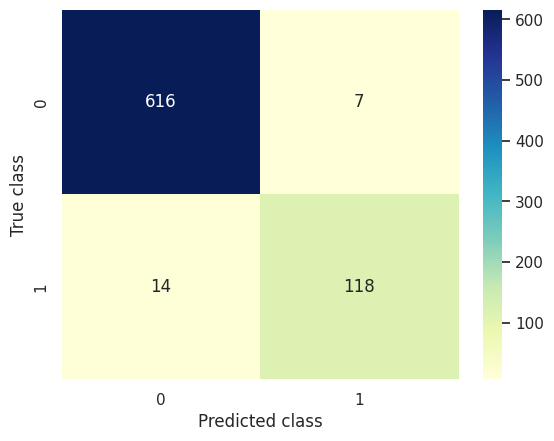

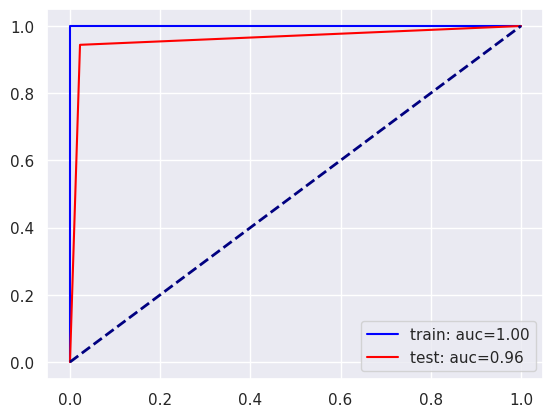

                  Model        Sampler  Precision    Recall  F1 Score
0   Logistic Regression     no_sampler   0.771084  0.484848  0.595349
1   Logistic Regression  Under_Sampler   0.460526  0.795455  0.583333
2   Logistic Regression   Over_Sampler   0.451327  0.772727  0.569832
3   Logistic Regression  SMOTE_Sampler   0.461538  0.772727  0.577904
4         Random Forest     no_sampler   0.981982  0.825758  0.897119
5         Random Forest  Under_Sampler   0.621212  0.931818  0.745455
6         Random Forest   Over_Sampler   0.975410  0.901515  0.937008
7         Random Forest  SMOTE_Sampler   0.982456  0.848485  0.910569
8            KNeighbors     no_sampler   0.710145  0.371212  0.487562
9            KNeighbors  Under_Sampler   0.374126  0.810606  0.511962
10           KNeighbors   Over_Sampler   0.606383  0.863636  0.712500
11           KNeighbors  SMOTE_Sampler   0.571429  0.878788  0.692537
12        XGBClassifier     no_sampler   0.954198  0.946970  0.950570
13        XGBClassif

In [ ]:
# Specify the models you want to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier()
}
evaluator = ModelEvaluator(models,X_train, X_test, y_train, y_test)
results = evaluator.fit_evaluate()
print(results)

In [ ]:
#Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    ##เปลี่ยนเป็น clfs แทนของเดิม def fit_evaluate(clfs, X_train, X_test, y_train, y_test):
    #แล้วเปลี่ยนเป็น for clf in clfs:
    # fit model to training data
    clf.fit(X_train, y_train)


    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       623
           1       0.95      0.95      0.95       132

    accuracy                           0.98       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.98      0.98      0.98       755


Confusion Matrix: 



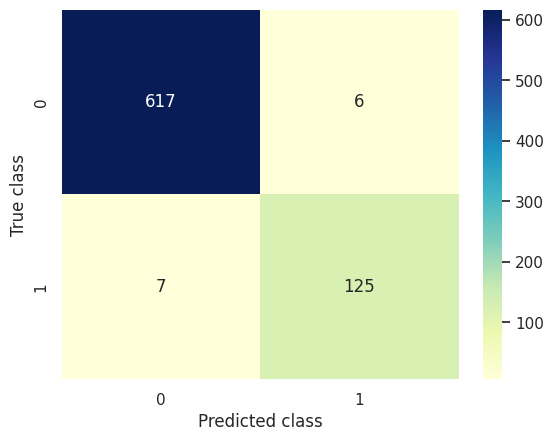

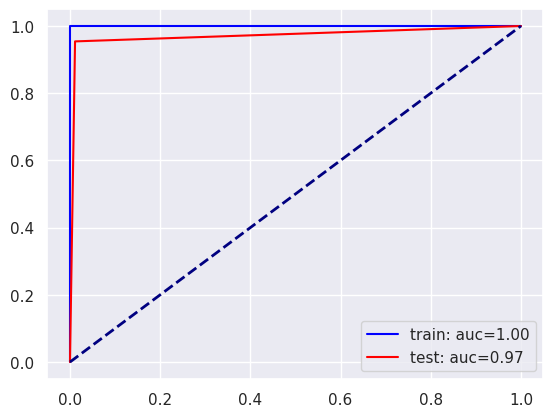

In [ ]:
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)

In [ ]:
featureImp = []

for feat, importance in zip(X.columns, modelXGB.feature_importances_):
    temp = [feat, importance*100]
    featureImp.append(temp)

fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])

sorted_features = fT_df.sort_values('Importance', ascending = False)
sorted_features = sorted_features.reset_index()
print(sorted_features)

    index                                Feature  Importance
0       0                                 Tenure   14.673425
1       7                               Complain    9.029687
2      33                   MaritalStatus_Single    5.421891
3      29          PreferedOrderCat_Mobile Phone    4.626490
4      27    PreferedOrderCat_Laptop & Accessory    4.608345
5      11                      DaySinceLastOrder    4.220677
6       6                        NumberOfAddress    3.954014
7      25               PreferedOrderCat_Fashion    3.588869
8       5                      SatisfactionScore    3.495441
9       1                               CityTier    3.413731
10     21          PreferredPaymentMode_E wallet    3.307106
11      4               NumberOfDeviceRegistered    3.281787
12     18  PreferredPaymentMode_Cash on Delivery    3.183587
13     31                 MaritalStatus_Divorced    2.675803
14      2                        WarehouseToHome    2.642813
15     13          Prefe